In [2]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

In [11]:
data = pd.read_csv('./data/igh_from_master.csv')
print(data.columns)
data["Trim Effeciency"] = 100*data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])

data['Trim Effeciency'] = data['Trim Effeciency'].fillna(0)
data= data[(data['Length'] =='100L')]
data['total_corrections']=data['Base - TP']+ data['Base - FP']
data.head()

Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency'],
      dtype='object')


,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency,total_corrections
4,4,bfc_rep.seq_sim_rl_100_cov_1_1_18.corrected.fa...,run.bfc.sh,18,167,942,5979,1,91,0,...,1,100L,0.050105,0.751832,0.033566,0.980702,IGH,0.000000,0.000000,955
6,7,bless_rep.seq_sim_rl_100_cov_1_1_18.corrected....,run.bless.sh,18,4356,1336,741,8,693,46,...,1,100L,0.891575,0.768728,0.623345,0.922987,IGH,0.072534,3.302041,14000
7,8,bfc_rep.seq_sim_rl_100_cov_2_1_18.corrected.fa...,run.bfc.sh,18,241,1897,12153,1,68,0,...,2,100L,0.026240,0.802338,0.019775,0.980356,IGH,0.000000,0.000000,941
11,13,lighter_rep.seq_sim_rl_100_cov_1_1_18.correcte...,run.lighter.sh,18,0,946,6234,0,0,0,...,1,100L,0.000000,NaN,0.000000,0.980032,IGH,0.000000,0.000000,0
12,14,bless_rep.seq_sim_rl_100_cov_2_1_18.corrected....,run.bless.sh,18,9198,2552,1815,9,715,71,...,2,100L,0.886248,0.859268,0.741097,0.936254,IGH,0.061469,4.014226,25285


In [12]:
data= data[(data['Kmer Size'] ==24)]
data.head()

,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency,total_corrections
184,364,bfc_rep.seq_sim_rl_100_cov_8_1_24.corrected.fa...,run.bfc.sh,24,0,131,894,0,0,0,...,8,100L,0.000000,NaN,0.000000,0.980166,IGH,0.000000,0.000000,0
185,365,bfc_rep.seq_sim_rl_100_cov_32_1_24.corrected.f...,run.bfc.sh,24,0,88,535,0,0,0,...,32,100L,0.000000,NaN,0.000000,0.980770,IGH,0.000000,0.000000,0
189,370,bless_rep.seq_sim_rl_100_cov_128_1_24.correcte...,run.bless.sh,24,0,65,337,0,1,0,...,128,100L,0.110429,0.986301,0.108896,0.917164,IGH,0.071241,4.319053,73
269,452,coral_rep.seq_sim_rl_100_cov_1_1_24.corrected....,run.coral.sh,24,2,0,0,0,0,0,...,1,100L,1.000000,1.000000,1.000000,1.000000,IGH,0.000000,0.000000,4
270,453,coral_rep.seq_sim_rl_100_cov_2_1_24.corrected....,run.coral.sh,24,5847,1081,1143,6,530,539,...,2,100L,0.833077,0.892155,0.732373,0.994649,IGH,0.000011,10.000000,16420


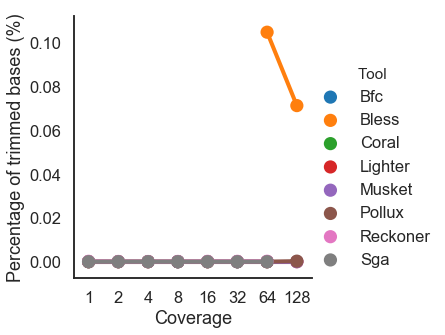

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")

g = sns.catplot(x="Coverage", y="Trim Percent", kind="point",data=data,hue='Tool')
g.set(xlabel='Coverage', ylabel='Percentage of trimmed bases (%)')
g=sns.despine()
#plt.show(g)
plt.savefig("Trim_Percent.png", bbox_inches='tight')

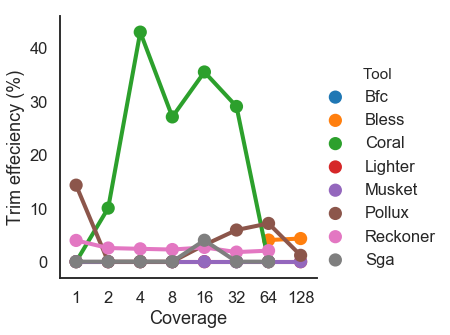

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")

g = sns.catplot(x="Coverage", y="Trim Effeciency", kind="point",data=data,hue='Tool')
g.set(xlabel='Coverage', ylabel='Trim effeciency (%)')
g=sns.despine()
#plt.show(g)
plt.savefig("Trim_Percent.png", bbox_inches='tight')

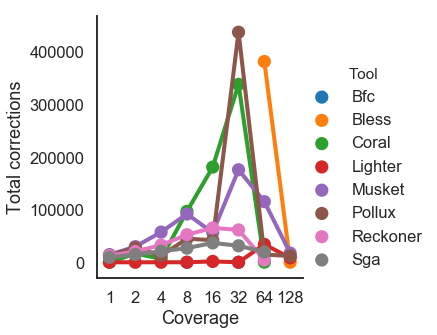

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Coverage", y="total_corrections", kind="point",data=data,hue='Tool')
, hue='Tool')
g.set(xlabel='Coverage', ylabel='Total corrections')
g=sns.despine()
#plt.show(g)
plt.savefig("total_corrections_vs_cov.png", bbox_inches='tight')

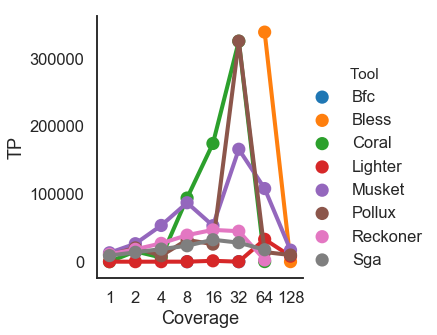

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Coverage", y="Base - TP", kind="point",data=data,hue='Tool')
, hue='Tool')
g.set(xlabel='Coverage', ylabel='TP')
g=sns.despine()
#plt.show(g)
plt.savefig("TP_vs_cov.png", bbox_inches='tight')

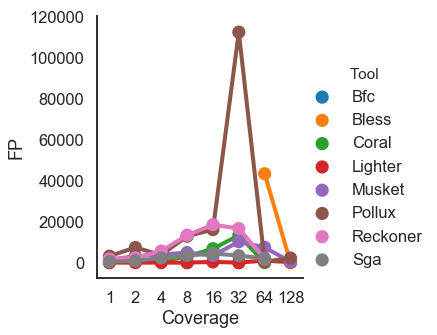

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Coverage", y="Base - FP", kind="point",data=data,hue='Tool')
, hue='Tool')
g.set(xlabel='Coverage', ylabel='FP')
g=sns.despine()
#plt.show(g)
plt.savefig("FP_vs_cov.png", bbox_inches='tight')

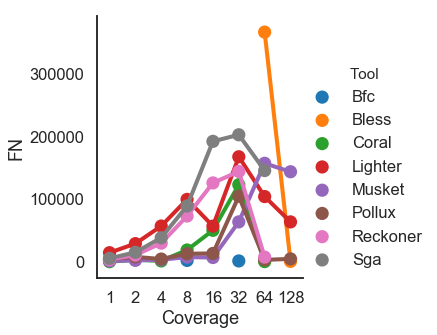

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Coverage", y="Base - FN", kind="point",data=data,hue='Tool')
, hue='Tool')
g.set(xlabel='Coverage', ylabel='FN')
g=sns.despine()
#plt.show(g)
plt.savefig("FN_vs_cov.png", bbox_inches='tight')

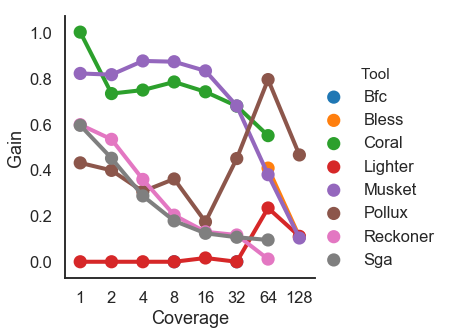

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Coverage", y="Base Gain", kind="point",data=data,hue='Tool')
, hue='Tool')
g.set(xlabel='Coverage', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("gain_vs_cov_IGH.png", bbox_inches='tight')

In [20]:
result = data.pivot(index='Tool', columns='Coverage', values='Base Gain')

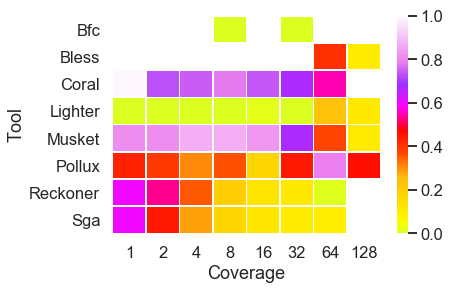

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, fmt="g", cmap='gist_ncar',center=0,linewidths=.5)
plt.savefig("heatmap_gain_vs_cov.png", bbox_inches='tight')

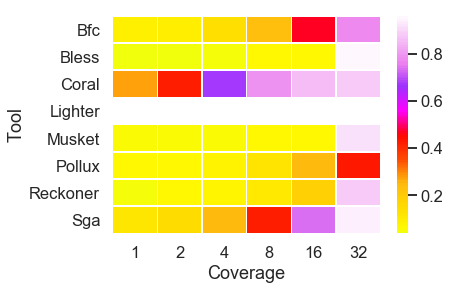

In [45]:
result_PPV = data.pivot(index='Tool', columns='Coverage', values='Base Precision')

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result_PPV, fmt="g", cmap='gist_ncar',center=0,linewidths=.5)
plt.savefig("heatmap_ppv_vs_cov.png", bbox_inches='tight')

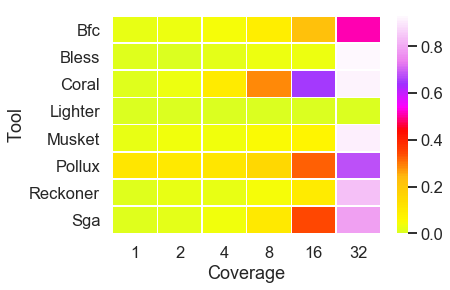

In [46]:
result_Sensitivity = data.pivot(index='Tool', columns='Coverage', values='Base Sensitivity')

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result_Sensitivity, fmt="g", cmap='gist_ncar',center=0,linewidths=.5)
plt.savefig("heatmap_sensitivity_vs_cov.png", bbox_inches='tight')